#Data Preparation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/wind_dataset.csv')

In [ ]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


#EDA/Exploratory Data Analysis

In [ ]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


#Data Preprocessing

In [ ]:
#Ngubah Date yang awalnya object menjadi datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6513 non-null   float64       
 5   T.MAX    5953 non-null   float64       
 6   IND.2    6513 non-null   float64       
 7   T.MIN    5900 non-null   float64       
 8   T.MIN.G  6214 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [ ]:
#Ubah datetime jadi 3 bagian (YEAR, MONTH, DAY)
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [ ]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


In [ ]:
#Hapus saja DATE karena sudah ada YEAR, MONTH, dan DAY

df.drop('DATE', axis=1, inplace=True)

In [ ]:
#Ubah IND menjadi float64
df['IND'] = df['IND'].astype('float64')

In [ ]:
# Berapa persen null-nya

null_persen = (df.isnull().sum() / len(df)) * 100
null_persen

,0
WIND,0.000000
IND,0.000000
RAIN,0.000000
IND.1,0.927898
T.MAX,9.446304
IND.2,0.927898
T.MIN,10.252510
T.MIN.G,5.476118
YEAR,0.000000
MONTH,0.000000


In [ ]:
# Untuk Null-nya diisi dengan nilai tengah
df.fillna(df.median()[0], inplace= True)

<ipython-input-14-87242b494244>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.fillna(df.median()[0], inplace= True)


In [ ]:
df.isnull().sum()

,0
WIND,0
IND,0
RAIN,0
IND.1,0
T.MAX,0
IND.2,0
T.MIN,0
T.MIN.G,0
YEAR,0
MONTH,0


#Data Processing

In [ ]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
0,13.67,0.0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,11.50,0.0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,11.25,0.0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,8.63,0.0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,11.92,0.0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


<Axes: >

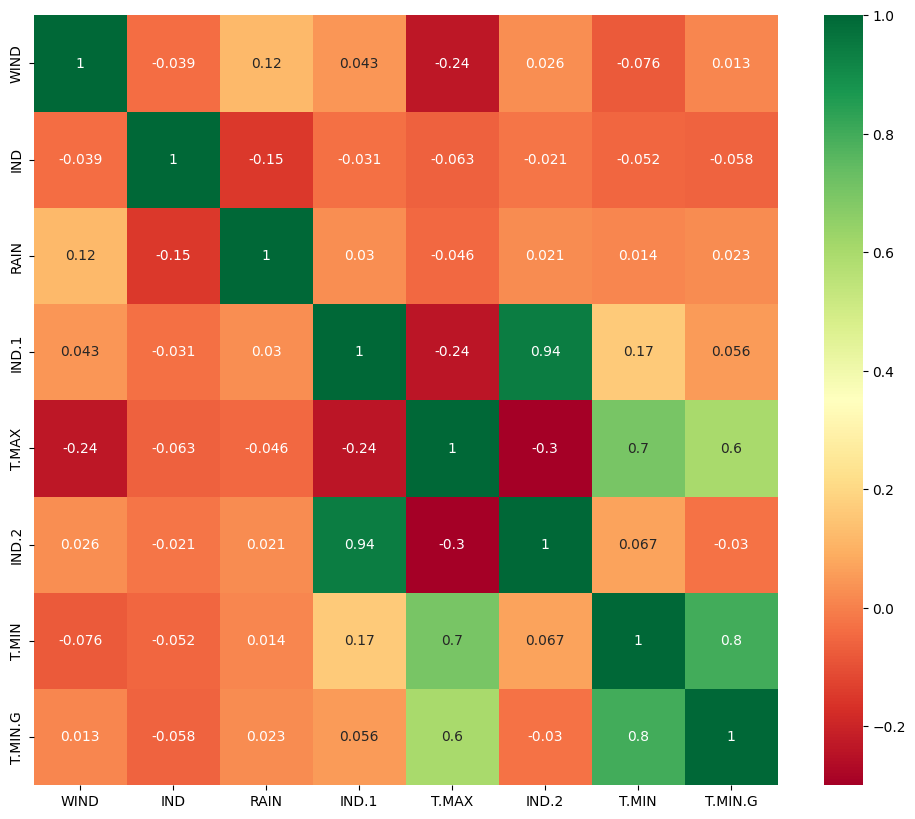

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.drop(['YEAR', 'MONTH', 'DAY'], axis = 1, inplace = True)
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

#Jika dilihat, Wind (Angin) memiliki korelasi tertinggi dengan Rain (Hujan) dengan 0.12

**Tidak perlu mencari outlier, karena data ini berasal dari realtime alami. Jadi ada kemungkinan nilainya memang benar diatas rata-rata atau dibawah rata-rata**

##**Data Processing menjadi Model Regresi Multi Linear**

Menggunakan Model Multi Linear Regression dimana beberapa independent variables digunakan untuk mencari dependent variabel yang kita ingin cari.

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0.0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0.0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0.0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0.0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0.0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   float64
 2   RAIN     6574 non-null   float64
 3   IND.1    6574 non-null   float64
 4   T.MAX    6574 non-null   float64
 5   IND.2    6574 non-null   float64
 6   T.MIN    6574 non-null   float64
 7   T.MIN.G  6574 non-null   float64
dtypes: float64(8)
memory usage: 411.0 KB


In [ ]:
X = df[df.columns[1:8]]
y = df['WIND']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#Modeling

**Model Regresi Multi Linear**

Model yang digunakan ada 2 yakni:
1.   Linear Regression
2.   Random Forest





In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, lin_pred)

print('R-squared', r2)
print('MAE:', mean_absolute_error(y_test, lin_pred))
print('MSE:', mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lin_pred)))

R-squared 0.12637216522347117
MAE: 3.828984852510284
MSE: 22.80668538924506
RMSE: 4.775634553569302


In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
r2 = r2_score(y_test, rfr_pred)

print('R-squared', r2)
print('MAE:', mean_absolute_error(y_test, rfr_pred))
print('MSE:', mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr_pred)))

R-squared 0.15445068763327596
MAE: 3.725892950555904
MSE: 22.073675288944063
RMSE: 4.698263007638468


#Evaluasi

                            OLS Regression Results                            
Dep. Variable:                   WIND   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     28.05
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.00e-36
Time:                        06:10:27   Log-Likelihood:                -3918.8
No. Observations:                1315   AIC:                             7854.
Df Residuals:                    1307   BIC:                             7895.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9147      0.132     74.928      0.0

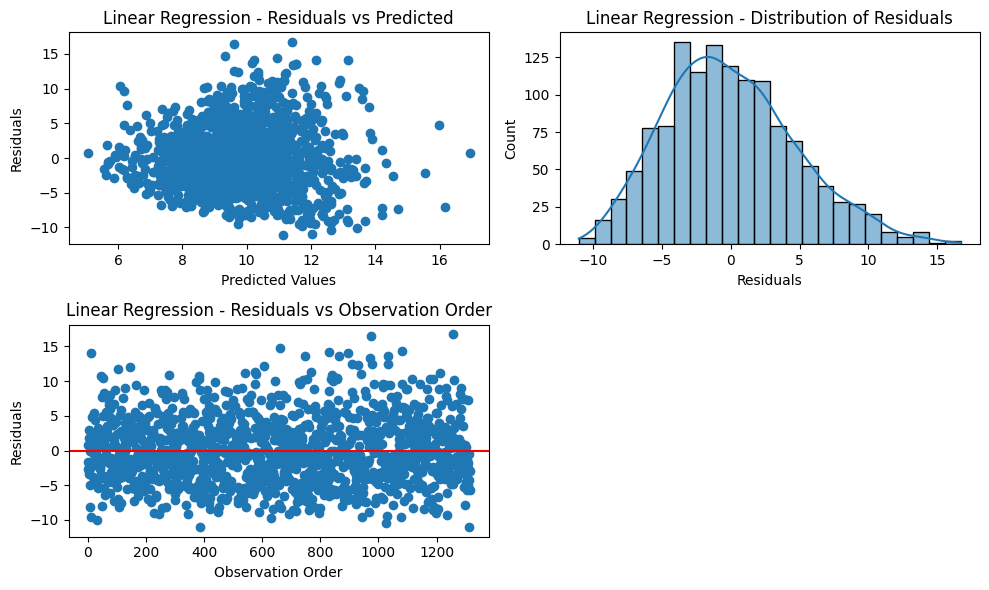

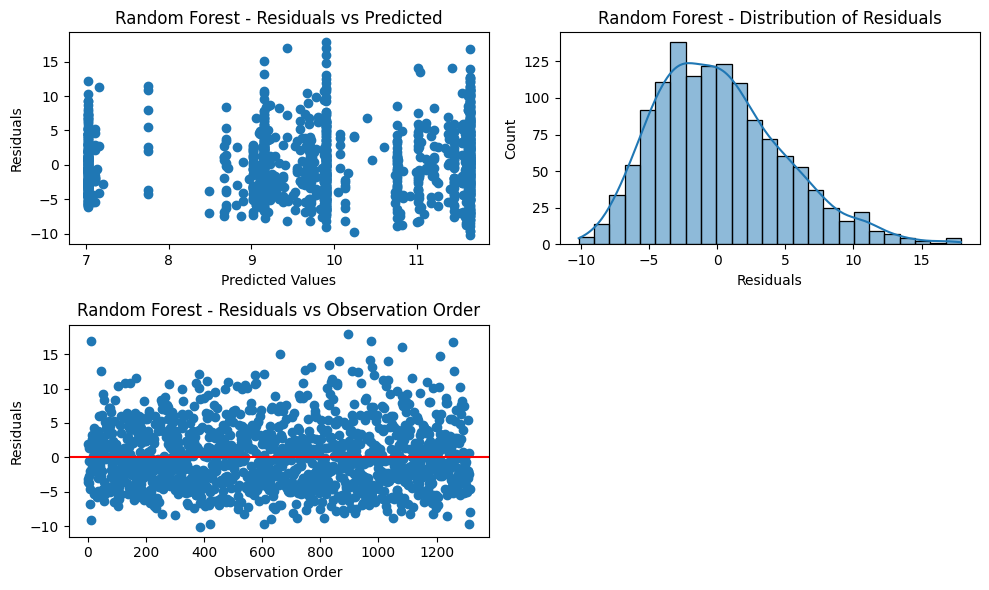

In [ ]:
import statsmodels.api as sm

models = {
    "Linear Regression": lin_reg,
    "Random Forest": rfr
}

for name, model in models.items():
    if name == "Linear Regression":
        # Residual analysis untuk linear regression dengan statsmodels
        X2 = sm.add_constant(X_test)
        est = sm.OLS(y_test, X2)
        est2 = est.fit()
        print(est2.summary())
        residuals = est2.resid
    else:
      residuals = y_test - model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.scatter(model.predict(X_test), residuals)
    plt.title(f'{name} - Residuals vs Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')


    plt.subplot(2, 2, 2)
    sns.histplot(residuals, kde=True)
    plt.title(f'{name} - Distribution of Residuals')
    plt.xlabel('Residuals')

    plt.subplot(2, 2, 3)
    plt.scatter(range(len(residuals)), residuals)  #Plot residuals against observation order
    plt.axhline(y=0, color='r', linestyle='-') #Add horizontal line at y=0
    plt.title(f'{name} - Residuals vs Observation Order')
    plt.xlabel('Observation Order')
    plt.ylabel('Residuals')


    plt.tight_layout()
    plt.show()